In [86]:
#!pip install scikit-learn

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [88]:
#demo_df = pd.read_excel(io = r"C:\Users\evass\Desktop\python_data_analysis\datasets\demo.xlsx")
demo_df = pd.read_excel(io = r"C:\Users\evass\Desktop\python_data_analysis\datasets\demo.xlsx")

In [89]:
?demo_df.rename

Signature:
demo_df.rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'IgnoreRaise' = 'ignore',
) -> 'DataFrame | None'
Docstring:
Rename columns or index labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or function transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
    Alterna

In [90]:
cols = {"Age":"age", "Gender":"gender", "Marital Status":"marital_status", "Address":"address",
       "Income":"income","Income Category":"income_category", "Job Category":"job_category",}

demo_df.rename(columns=cols, inplace=True)

In [91]:
demo_df.columns

Index(['age', 'gender', 'marital_status', 'address', 'income',
       'income_category', 'job_category'],
      dtype='object')

In [92]:
demo_df.describe() #will only give us numerical values

,age,address,income,income_category,job_category
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,42.475000,11.485000,76.305000,2.520000,1.950000
std,12.801122,10.365665,107.554647,1.065493,0.781379
min,19.000000,0.000000,11.000000,1.000000,1.000000
25%,32.000000,3.000000,27.000000,2.000000,1.000000
50%,43.000000,9.000000,44.500000,2.000000,2.000000
75%,51.000000,17.000000,76.000000,4.000000,3.000000
max,76.000000,51.000000,873.000000,4.000000,3.000000


In [93]:
?demo_df.describe

Signature: demo_df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits 

In [94]:
demo_df.select_dtypes(include=["object"])

,gender,marital_status
0,f,1
1,m,0
2,f,no answer
3,m,1
4,m,no answer
...,...,...
195,f,0
196,f,1
197,f,1
198,m,0


In [95]:
demo_df.select_dtypes(include=["object"]).describe()

,gender,marital_status
count,200,200
unique,4,3
top,f,0
freq,99,102


In [96]:
#demo_df["gender"].value_counts()
demo_df['gender'].value_counts().index

Index(['f', 'm', '  f', '   m'], dtype='object', name='gender')

In [97]:
demo_df.gender.unique()

array(['f', 'm', '  f', '   m'], dtype=object)

In [98]:
?demo_df.replace

Signature:
demo_df.replace(
    to_replace=None,
    value=<no_default>,
    *,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    regex: 'bool_t' = False,
    method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>,
) -> 'Self | None'
Docstring:
Replace values given in `to_replace` with `value`.

Values of the Series/DataFrame are replaced with other values dynamically.
This differs from updating with ``.loc`` or ``.iloc``, which require
you to specify a location to update with some value.

Parameters
----------
to_replace : str, regex, list, dict, Series, int, float, or None
    How to find the values that will be replaced.

    * numeric, str or regex:

        - numeric: numeric values equal to `to_replace` will be
          replaced with `value`
        - str: string exactly matching `to_replace` will be replaced
          with `value`
        - regex: regexs matching `to_replace` will be replaced with
          `value`

    * list of str, regex, 

In [99]:
demo_df2 = demo_df.replace(to_replace="  f", value="f")

In [100]:
demo_df2.gender.unique()

array(['f', 'm', '   m'], dtype=object)

In [101]:
gender_col = demo_df2.gender.replace(to_replace="   m", value="m")
gender_col

0      f
1      m
2      f
3      m
4      m
      ..
195    f
196    f
197    f
198    m
199    m
Name: gender, Length: 200, dtype: object

In [102]:
gender_col.unique()

array(['f', 'm'], dtype=object)

In [103]:
demo_df2["gender"] = gender_col

In [104]:
demo_df2.gender.unique()

array(['f', 'm'], dtype=object)

In [105]:
demo_df2.marital_status.unique()

array([1, 0, 'no answer'], dtype=object)

In [106]:
demo_df2.marital_status.value_counts()

marital_status
0            102
1             93
no answer      5
Name: count, dtype: int64

In [107]:
?demo_df2.select_dtypes

Signature: demo_df2.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/

In [108]:
demo_df2.select_dtypes(include=["number"]) #"float64","int64"

,age,address,income,income_category,job_category
0,55,12,72,3,3
1,56,29,153,4,3
2,28,9,28,2,1
3,24,4,26,2,1
4,25,2,23,1,2
...,...,...,...,...,...
195,45,3,86,4,3
196,23,2,27,2,1
197,66,32,11,1,2
198,49,4,30,2,1


In [109]:
demo_df2.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x23eb7b44560>,
 'caps': [<matplotlib.lines.Line2D at 0x23eb7ad7f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x23eb7b44890>],
 'medians': [<matplotlib.lines.Line2D at 0x23eb7ad78f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23eb7ad75c0>],
 'means': []}

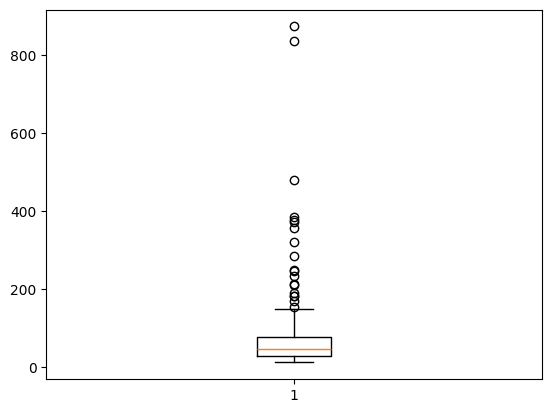

In [110]:
plt.boxplot(demo_df2["income"])

In [111]:
#exercise: function to calucate outliers:
#lower fence = Q1 - 1.5(Q3-Q1)
#upper fence = Q3 + 1.5(Q3-Q1)

In [112]:
def getOutliers(column):

    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    interquantile_range = q3-q1
    lower_fence = q1 - 1.5*interquantile_range
    upper_fence = q3 + 1.5*interquantile_range

    outlier_indices = np.where((column < lower_fence) | (column > upper_fence))[0]
    outliers = np.array(column[outlier_indices])
    
    return outliers, outlier_indices

In [113]:
outliers, outlier_indices = getOutliers(demo_df2.income)
outliers

array([153, 283, 213, 873, 321, 248, 376, 168, 209, 478, 246, 181, 385,
       188, 181, 837, 232, 371, 355], dtype=int64)

In [114]:
outlier_indices

array([  1,  14,  41,  49,  71,  79,  81,  88,  97,  99, 101, 113, 120,
       141, 151, 153, 165, 189, 191], dtype=int64)

In [115]:
?demo_df2.drop

Signature:
demo_df2.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label o

In [116]:
demo_df3 = demo_df2.drop(outlier_indices)

(array([ 7., 12., 11., 17., 11., 10., 10., 17., 14., 18., 14., 17., 14.,
         6.,  7.,  6.,  5.,  2.,  1.,  1.]),
 array([19.  , 21.85, 24.7 , 27.55, 30.4 , 33.25, 36.1 , 38.95, 41.8 ,
        44.65, 47.5 , 50.35, 53.2 , 56.05, 58.9 , 61.75, 64.6 , 67.45,
        70.3 , 73.15, 76.  ]),
 <BarContainer object of 20 artists>)

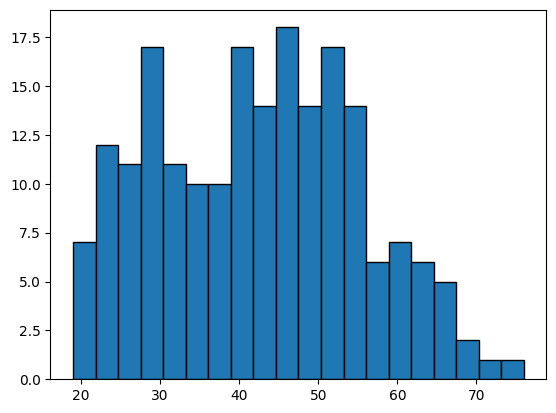

In [117]:
plt.hist(demo_df2.age, bins = 20, edgecolor = "black")

(array([11., 24., 37., 12., 18., 18.,  8.,  9.,  9.,  9.,  6.,  2.,  2.,
         2.,  4.,  2.,  0.,  1.,  2.,  5.]),
 array([ 11.  ,  17.85,  24.7 ,  31.55,  38.4 ,  45.25,  52.1 ,  58.95,
         65.8 ,  72.65,  79.5 ,  86.35,  93.2 , 100.05, 106.9 , 113.75,
        120.6 , 127.45, 134.3 , 141.15, 148.  ]),
 <BarContainer object of 20 artists>)

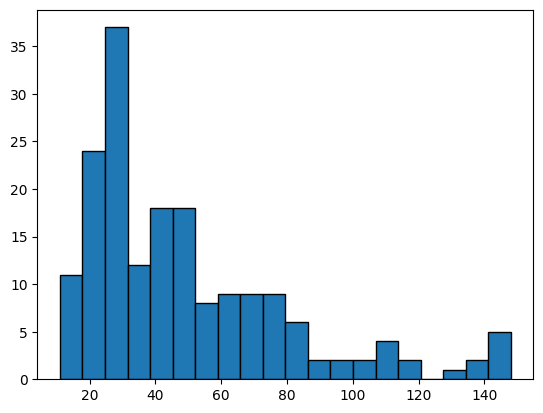

In [118]:
plt.hist(demo_df3.income, bins=20, edgecolor="black")

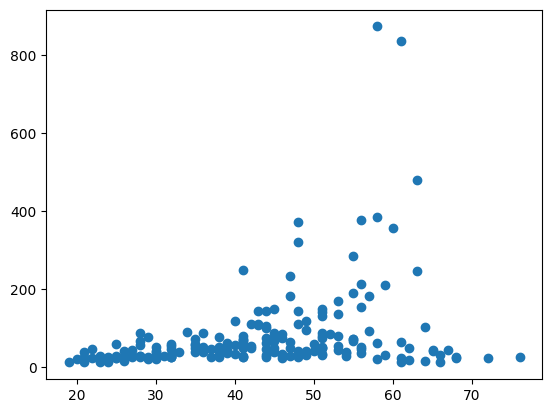

In [119]:
plt.scatter(demo_df2.age, demo_df2.income)

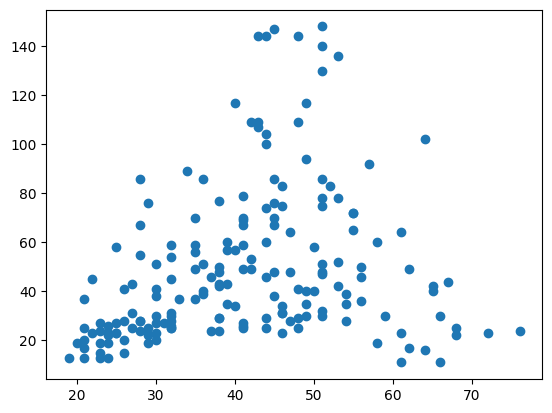

In [120]:
plt.scatter(demo_df3.age, demo_df3.income)

In [121]:
demo_df2 = demo_df2[demo_df.income<600]

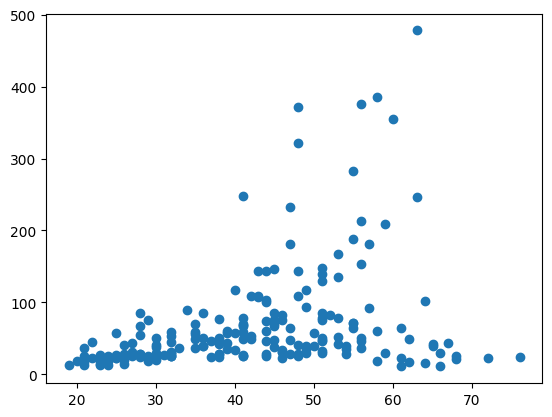

In [122]:
plt.scatter(demo_df2.age, demo_df2.income)

In [123]:
#remove rows with marital status = no answer
demo_data = demo_df2[demo_df2.marital_status != "no answer"]
demo_data.sample(n=5)

,age,gender,marital_status,address,income,income_category,job_category
128,30,m,1,1,30,2,2
116,29,m,1,4,22,1,1
52,36,f,0,17,86,4,2
41,56,f,0,7,213,4,3
165,47,f,0,22,232,4,3


In [124]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              193 non-null    int64 
 1   gender           193 non-null    object
 2   marital_status   193 non-null    object
 3   address          193 non-null    int64 
 4   income           193 non-null    int64 
 5   income_category  193 non-null    int64 
 6   job_category     193 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.1+ KB


In [125]:
demo_data.marital_status = demo_data.marital_status.astype("int")

C:\Users\evass\AppData\Local\Temp\ipykernel_21092\1012965593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_data.marital_status = demo_data.marital_status.astype("int")


In [126]:
#convert gender to 0s and 1s:
#first create copy
demo_data_2 = demo_data.copy()

In [127]:
#use function pd.get_dummies
demo_data_3 = pd.get_dummies(data = demo_data_2, columns = ['gender'])
demo_data_3

,age,marital_status,address,income,income_category,job_category,gender_f,gender_m
0,55,1,12,72,3,3,True,False
1,56,0,29,153,4,3,False,True
3,24,1,4,26,2,1,False,True
5,45,0,9,76,4,2,False,True
6,44,1,17,144,4,3,False,True
...,...,...,...,...,...,...,...,...
195,45,0,3,86,4,3,True,False
196,23,1,2,27,2,1,True,False
197,66,1,32,11,1,2,True,False
198,49,0,4,30,2,1,False,True


In [128]:
#changing gender columns to one with 0 and 1
demo_data_4 = pd.get_dummies(data = demo_data_2, columns = ['gender'], drop_first = True, dtype = "int")
demo_data_4

,age,marital_status,address,income,income_category,job_category,gender_m
0,55,1,12,72,3,3,0
1,56,0,29,153,4,3,1
3,24,1,4,26,2,1,1
5,45,0,9,76,4,2,1
6,44,1,17,144,4,3,1
...,...,...,...,...,...,...,...
195,45,0,3,86,4,3,0
196,23,1,2,27,2,1,0
197,66,1,32,11,1,2,0
198,49,0,4,30,2,1,1


In [129]:
y = demo_data_4.marital_status
X = demo_data_4.drop('marital_status', axis=1)

In [130]:
X.head()

,age,address,income,income_category,job_category,gender_m
0,55,12,72,3,3,0
1,56,29,153,4,3,1
3,24,4,26,2,1,1
5,45,9,76,4,2,1
6,44,17,144,4,3,1


In [131]:
y[50]

0

In [132]:
lg_model = LogisticRegression()

In [133]:
lg_model.fit(X, y)

LogisticRegression()

In [134]:
#what is the classification accuracy
lg_model.score(X,y)

0.5440414507772021

In [135]:
#split dataset in train and test set:
#recall:
a,b = (3,5)
print(a,b)

3 5


In [136]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [138]:
X_train

,age,address,income,income_category,job_category,gender_m
75,30,0,20,1,1,0
54,51,5,30,2,2,0
198,49,4,30,2,1,1
87,30,10,27,2,1,0
60,23,1,15,1,1,1
...,...,...,...,...,...,...
143,51,2,48,2,2,1
125,46,7,83,4,2,0
132,23,0,24,1,1,1
178,32,7,25,2,1,0


In [139]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [140]:
lg_model.score(X_test, y_test)

0.5306122448979592

In [141]:
#to predict using model:
?lg_model.predict

Signature: lg_model.predict(X)
Docstring:
Predict class labels for samples in X.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data matrix for which we want to get the predictions.

Returns
-------
y_pred : ndarray of shape (n_samples,)
    Vector containing the class labels for each sample.
File:      c:\users\evass\desktop\python_data_analysis\dataidea\lib\site-packages\sklearn\linear_model\_base.py
Type:      method

In [142]:
lg_model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1])

In [143]:
#predict on a single object: lets use some of the rows with "no answer" for marital_status
demo_df2[demo_df2.marital_status == "no answer"]

,age,gender,marital_status,address,income,income_category,job_category
2,28,f,no answer,9,28,2,1
4,25,m,no answer,2,23,1,2
7,46,m,no answer,20,75,4,3
8,41,m,no answer,10,26,2,2
9,29,f,no answer,4,19,1,2


In [144]:
#see column order for X_train:
X_train.head(n=1)

,age,address,income,income_category,job_category,gender_m
75,30,0,20,1,1,0


In [145]:
#predict on a single object:
lg_model.predict(X=[[28,9,28,2,1,0]])
#homework: code to pick out a row instead of entering values one by one

C:\Users\evass\Desktop\python_data_analysis\dataidea\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [146]:
lg_model.predict(X=[[46,20,75,4,3,1]])

C:\Users\evass\Desktop\python_data_analysis\dataidea\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [147]:
#write function to get the classification accuracy of the model
#inputs to function are X_test, Y_test
#or: get predictions on X_test:
#true values ie y_test
#correct/total

In [148]:
#classification accuracy = no. of correct predictions/total number of predictions:
def classificationAccuracy(X_test, Y_test):
    #get predictions:
    Y_predicted = lg_model.predict(X = X_test)

    #using true = 1 and false = 0 to count matches:
    no_correct = (Y_predicted != Y_test).sum()
    
    acc = no_correct/(Y_test.count())
    return acc

In [149]:
classificationAccuracy(X_test=X_test, Y_test=y_test)

0.46938775510204084

In [150]:
#trying decision tree classifier:
dt_classifier = DecisionTreeClassifier()

In [151]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
dt_classifier.score(X_test, y_test)

0.5306122448979592

In [153]:
#predict on a single object:
dt_classifier.predict(X=[[28,9,28,2,1,0]])

C:\Users\evass\Desktop\python_data_analysis\dataidea\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [154]:
dt_classifier.predict(X=X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0])

In [155]:
#compare the predictions from the lg model and the dt classifier
#compare different values and states for random state.
#on the same dataset, a model to predict income,  a model to predict income category
#predict marital status for those with "no answer"

In [156]:
#compare the predictions from the lg model and the dt classifier
#classification accuracy = no. of correct predictions/total number of predictions:
def classificationAccuracyDt(X_test, Y_test):
    #get predictions:
    Y_predicted = dt_classifier.predict(X = X_test)

    #using true = 1 and false = 0 to count matches:
    no_correct = (Y_predicted != Y_test).sum()
    
    acc = no_correct/(Y_test.count())
    return acc

In [157]:
classificationAccuracyDt(X_test=X_test, Y_test=y_test)

0.46938775510204084

In [180]:
#on the same dataset, a model to predict income: let's use the decision tree regressor:
#use demo_data_4 since gender column has been changed to dummies:
y = demo_data_4.income
X = demo_data_4.drop('income', axis=1)
X.head()

,age,marital_status,address,income_category,job_category,gender_m
0,55,1,12,3,3,0
1,56,0,29,4,3,1
3,24,1,4,2,1,1
5,45,0,9,4,2,1
6,44,1,17,4,3,1


In [181]:
y.head()

0     72
1    153
3     26
5     76
6    144
Name: income, dtype: int64

In [182]:
#splitting into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,age,marital_status,address,income_category,job_category,gender_m
72,36,0,8,3,1,1
37,57,0,28,4,3,0
141,55,0,13,4,3,1
193,53,1,30,2,1,1
44,22,0,0,2,1,0
...,...,...,...,...,...,...
136,51,1,1,4,3,0
129,54,0,21,2,2,0
196,23,1,2,2,1,0
46,49,0,0,4,3,0


In [187]:
#decision tree regressor, since income is regression: DecisionTreeRegressor
dt_regressor_income = DecisionTreeRegressor(random_state=1)
dt_regressor_income.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [188]:
#test model: not sure about this
dt_regressor_income.score(X_test, y_test)

0.0033047291265977385

In [189]:
def meanSquareErrorDt(X_test, Y_test):
    #get predictions:
    Y_predicted = dt_regressor_income.predict(X = X_test)

    #using true = 1 and false = 0 to count matches:v
    mse = sum((Y_predicted - Y_test)**2)/len(Y_test)
    
    return mse

In [190]:
meanSquareErrorDt(X_test=X_test, Y_test=y_test)

2255.4744897959185

In [191]:
#on the same dataset, a model to predict income category
#use demo_data_4 since gender column has been changed to dummies:
y = demo_data_4.income_category
X = demo_data_4.drop('income_category', axis=1)
X.head()

,age,marital_status,address,income,job_category,gender_m
0,55,1,12,72,3,0
1,56,0,29,153,3,1
3,24,1,4,26,1,1
5,45,0,9,76,2,1
6,44,1,17,144,3,1


In [192]:
#split data into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [196]:
#fit a logistic regression model since we are predicting a categorical type. Set random state:
lg_model_income_cat = LogisticRegression(random_state=1)
lg_model_income_cat.fit(X_train, y_train)

C:\Users\evass\Desktop\python_data_analysis\dataidea\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [197]:
#test model: not sure about this
lg_model_income_cat.score(X_test, y_test)

0.7551020408163265

In [198]:
def classificationAccuracy(X_test, Y_test):
    #get predictions:
    Y_predicted = lg_model_income_cat.predict(X = X_test)

    #using true = 1 and false = 0 to count matches:
    no_correct = (Y_predicted != Y_test).sum()
    
    acc = no_correct/(Y_test.count())
    return acc

In [199]:
classificationAccuracy(X_test=X_test, Y_test=y_test)

0.24489795918367346

In [201]:
#trying a linear regression model for income:
#use demo_data_4 since gender column has been changed to dummies:
y = demo_data_4.income
X = demo_data_4.drop('income', axis=1)
X.head()

,age,marital_status,address,income_category,job_category,gender_m
0,55,1,12,3,3,0
1,56,0,29,4,3,1
3,24,1,4,2,1,1
5,45,0,9,4,2,1
6,44,1,17,4,3,1


In [202]:
#splitting into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,age,marital_status,address,income_category,job_category,gender_m
171,24,0,5,1,1,1
64,43,1,8,4,3,0
79,41,0,20,4,2,0
85,30,0,4,1,1,0
100,41,1,8,2,2,0
...,...,...,...,...,...,...
169,41,1,10,3,3,0
150,21,1,2,1,1,1
13,21,1,2,1,1,0
17,21,0,1,2,1,1


In [204]:
#LinearRegression model, no random state since this is line of best fit
linearreg_income = LinearRegression()
linearreg_income.fit(X_train, y_train)

LinearRegression()

In [205]:
#test model: not sure about this
linearreg_income.score(X_test, y_test)

0.5666376463566181

In [206]:
def meanSquareErrorLg(X_test, Y_test):
    #get predictions:
    Y_predicted = linearreg_income.predict(X = X_test)

    #using true = 1 and false = 0 to count matches:v
    mse = sum((Y_predicted - Y_test)**2)/len(Y_test)
    
    return mse

In [207]:
meanSquareErrorLg(X_test=X_test, Y_test=y_test)

1562.592019954123